<a href="https://colab.research.google.com/github/amir1913/PUS2022_AMeydani/blob/main/HW6/REVISED_Chicago_Energy_Benchmarking_RandomForest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following the paper "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" [Roth et al 2019](https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective), choose 2 cities in the dataset available through the paper's github repository https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking

This paper is an excellent example of reproducible research. 

I also created an example of using random forest classifier and regressors here https://github.com/fedhere/PUS2022_FBianco/blob/master/classdemo/COVID19LOS_featureExtractionRFexample.ipynb and there are links at the bottom of this notebook to useful functions and examples on the internet of applications of methods you will need to use.

1. Read the introduction to the paper and describe here (briefly) the goals of their analysis (and the analysis that you are about to reproduce). Max 200 words.
2. Choose 2 cities (any 2 cities except Seattle cause I am running some of the Seattle analysis below for guidance)
3. For each of the 2 cities reproduce their analysis by 

  3.1 gathering the original data from their repository (see below for Seattle example)

  3.2 clean the data according to their data preparation scheme, including one-hot-encoding categorical variables, except to impute missing data using KNearestNeighors instead of Gibbs sampling (see below)

  3.3 run a Random Forest (RF) Regressor to predict the total energy consumption.

  3.4 evaluate the RF model performance by printing the R2 score (the default score in SKLearn RF) for training and test set (discuss)

  3.5 plot the features sorted by their importance and identify the most important features. are they consistent between the 2 cities? are they consistent with the paper's result?
4 compare the result for the 2 cities (discuss)

5. Extra credit: 

  5.1 modify the target variable to a binary variable choosing the median of the variable values as the the energy threshold and predict whether the value is higher or lower than the threshold
  5.2 Run a Random Forest Classifier to predict if an observation is in the upper 50% percentile or lower 50% percentile (above or below the median threshold)
  5.3 Measure the performance of the model on training and test data
  5.4 Measure the feature importance and assess if the important feature have changed (discuss)

**1.**

Roth et al. (2019) have done comprehensive research on applying data-driven methods on energy benchmarking for several major cities. Due to the importance of the Energy supply and market efficiency, evaluating the energy consumed against different variables can give a good perspective to the policymakers in order to implement their best plans for having efficient energy systems and reducing energy consumption in major cities. The data-driven benchmarking method used in this study helped them employ a low-cost comprehensive survey method. Without using data-driven methods and open data, the cost of implementing Commercial Building Energy Consumption Surveys would be higher, with less or equal accuracy.

In this assignment, I have investigated Chicago's energy benchmarking using the Random Forest regression tree. This is done to find the most influential variables on the site energy usage of each building so that we understand energy consumption changes with the changing of which variables. From the technical perspective, I will learn how to implement regression-based data-driven modeling by starting from a row CSV file and then collecting the features' importance ratio.  

In [3]:
import pandas as pd
import numpy as np

# choose a city and read in the data

In [4]:
Chicago = pd.read_csv("https://raw.githubusercontent.com/amir1913/PUS2022_AMeydani/main/HW6/Chicago_Energy_Benchmarking_-_2017_Data_Reported_in_2018.csv", thousands=',')

# inspect the dataframe

In [5]:
print("there are (rows, columns) = ", (Chicago.shape), "in the dataframe")

there are (rows, columns) =  (2797, 25) in the dataframe


In [6]:
Chicago

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location
0,2017,254171,Norville Center - Gentile Center-ID#254171,6526 N Winthrop,60626,Rogers Park,College/University,127500,2011,2,...,NaN,98.7,206.5,103.0,210.8,1495.3,11.7,41.990969,-87.658150,"(41.9909694, -87.65815)"
1,2017,252252,Grace St.,635 W. Grace St.,60613,LAKE VIEW,Multifamily Housing,125820,1974,1,...,NaN,100.3,146.2,107.7,154.0,995.0,7.9,41.951719,-87.647380,"(41.95171857, -87.64738013)"
2,2017,165328,2750 W Roosevelt Rd,2750 W Roosevelt Rd,60608,NORTH LAWNDALE,Residence Hall/Dormitory,121626,2006,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.866846,-87.695308,"(41.86684596, -87.69530763)"
3,2017,103621,Chicago River North Residence Inn & Spri,410 North Dearborn St.,60610,NEAR NORTH SIDE,Hotel,369707,2000,1,...,NaN,99.8,185.4,103.5,188.8,3839.6,10.4,41.889490,-87.629607,"(41.88948997, -87.62960735)"
4,2017,160323,One Place Condominium Association,1 East 8th Street,60605,LOOP,Multifamily Housing,312000,2008,1,...,NaN,76.8,127.7,79.7,130.3,2199.0,7.0,41.871372,-87.627087,"(41.87137219, -87.62708742)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,2017,159740,Sunnyside Apartments,840 W. Sunnyside,60640,UPTOWN,Multifamily Housing,247000,1970,1,...,NaN,47.2,64.2,50.3,67.5,847.2,3.4,41.963961,-87.651810,"(41.96396119, -87.65181003)"
2793,2017,251627,Edison Park-CPS,6220 N Olcott Ave,60631,NORWOOD PARK,K-12 School,60475,1948,1,...,NaN,101.6,173.5,111.3,183.7,581.0,9.6,41.993983,-87.814210,"(41.99398251, -87.81420976)"
2794,2017,254163,Maguire Hall-ID#254163,1-11 E Pearson Ave,60611,Near North Side,Office,55056,1980,1,...,NaN,105.5,225.4,110.9,230.4,706.4,12.8,41.895788,-87.622470,"(41.8957877, -87.62247)"
2795,2017,137157,LZ Products,2121 W 21st Street,60608,LOWER WEST SIDE,Wholesale Club/Supercenter,72000,1900,1,...,NaN,22.8,40.6,24.6,42.6,163.0,2.3,41.853707,-87.679322,"(41.85370711, -87.67932199)"


In [7]:
Chicago.describe()

,Data Year,ID,ZIP Code,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
count,2797.0,2797.000000,2797.000000,2.797000e+03,2797.000000,2797.000000,2389.00000,2.763000e+03,2.540000e+03,6.600000e+01,9.400000e+01,1.600000e+01,2761.000000,2761.000000,2716.000000,2716.000000,2745.000000,2744.000000,2797.000000,2797.000000
mean,2017.0,184593.453700,60626.065785,2.417152e+05,1963.099392,1.385413,58.97028,1.027161e+07,1.165939e+07,3.087190e+07,1.467572e+07,1.251777e+06,92.282470,174.298370,96.633284,179.308211,2525.770200,9.786224,41.884620,-87.653710
std,0.0,59926.383713,19.694119,3.844379e+05,36.759262,5.024138,28.30448,2.405448e+07,2.293453e+07,6.386348e+07,1.651860e+07,2.939863e+06,69.656722,123.224506,64.300728,119.201131,5569.104799,7.016333,0.069040,0.047255
min,2017.0,100001.000000,60601.000000,5.000000e+04,1860.000000,1.000000,1.00000,4.871000e+04,4.230000e+03,-1.424467e+07,-1.248819e+06,1.313200e+04,0.200000,0.200000,0.200000,0.200000,0.700000,0.200000,41.651404,-87.905562
25%,2017.0,120518.000000,60610.000000,7.453600e+04,1927.000000,1.000000,36.00000,1.814672e+06,3.365141e+06,5.815971e+06,4.172481e+06,2.836400e+04,61.600000,111.600000,65.675000,117.300000,583.400000,6.100000,41.858663,-87.667672
50%,2017.0,173708.000000,60618.000000,1.226660e+05,1969.000000,1.000000,63.00000,3.850186e+06,5.859254e+06,1.460381e+07,8.389686e+06,7.240850e+04,79.400000,143.800000,84.850000,151.300000,1081.500000,8.000000,41.890292,-87.641787
75%,2017.0,251382.000000,60642.000000,2.536200e+05,1998.000000,1.000000,84.00000,9.332554e+06,1.211037e+07,2.503619e+07,1.813927e+07,1.386255e+05,100.800000,192.900000,107.225000,198.800000,2433.100000,11.000000,41.925024,-87.626698
max,2017.0,260184.000000,60827.000000,9.245333e+06,2017.000000,236.000000,100.00000,5.174905e+08,4.348998e+08,4.779617e+08,8.264093e+07,9.682000e+06,1692.700000,1780.200000,1381.200000,1711.600000,134961.200000,90.100000,42.021720,-87.527913


# TASK 1 Clean the data 
follow closely the second paragraph of Section 4 DATA. Name each step you do accordingly to the description in the paragraf
https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective 

you can also help yourself inspecting the final datasets posted on the github repo but name each action according to the paper narrative: for example, if you drop "Building ID" indicate that this is done as part of 
_We then cleaned the datasets by removing irrelevant building-identifying features (such as
address)_, or if dropping a variable with too many missing values _removing features that had missing values for greater than 40% of the buildings in the dataset._

**1.1**
Droping Building ID based on "We then cleaned the datasets by removing irrelevant building-identifying features (such as address)"


In [8]:
Chicagoo = Chicago.drop(['Address'], axis=1)

In [9]:
Chicagoo

,Data Year,ID,Property Name,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,...,All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location
0,2017,254171,Norville Center - Gentile Center-ID#254171,60626,Rogers Park,College/University,127500,2011,2,NaN,...,NaN,98.7,206.5,103.0,210.8,1495.3,11.7,41.990969,-87.658150,"(41.9909694, -87.65815)"
1,2017,252252,Grace St.,60613,LAKE VIEW,Multifamily Housing,125820,1974,1,68.0,...,NaN,100.3,146.2,107.7,154.0,995.0,7.9,41.951719,-87.647380,"(41.95171857, -87.64738013)"
2,2017,165328,2750 W Roosevelt Rd,60608,NORTH LAWNDALE,Residence Hall/Dormitory,121626,2006,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.866846,-87.695308,"(41.86684596, -87.69530763)"
3,2017,103621,Chicago River North Residence Inn & Spri,60610,NEAR NORTH SIDE,Hotel,369707,2000,1,21.0,...,NaN,99.8,185.4,103.5,188.8,3839.6,10.4,41.889490,-87.629607,"(41.88948997, -87.62960735)"
4,2017,160323,One Place Condominium Association,60605,LOOP,Multifamily Housing,312000,2008,1,22.0,...,NaN,76.8,127.7,79.7,130.3,2199.0,7.0,41.871372,-87.627087,"(41.87137219, -87.62708742)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,2017,159740,Sunnyside Apartments,60640,UPTOWN,Multifamily Housing,247000,1970,1,94.0,...,NaN,47.2,64.2,50.3,67.5,847.2,3.4,41.963961,-87.651810,"(41.96396119, -87.65181003)"
2793,2017,251627,Edison Park-CPS,60631,NORWOOD PARK,K-12 School,60475,1948,1,54.0,...,NaN,101.6,173.5,111.3,183.7,581.0,9.6,41.993983,-87.814210,"(41.99398251, -87.81420976)"
2794,2017,254163,Maguire Hall-ID#254163,60611,Near North Side,Office,55056,1980,1,45.0,...,NaN,105.5,225.4,110.9,230.4,706.4,12.8,41.895788,-87.622470,"(41.8957877, -87.62247)"
2795,2017,137157,LZ Products,60608,LOWER WEST SIDE,Wholesale Club/Supercenter,72000,1900,1,92.0,...,NaN,22.8,40.6,24.6,42.6,163.0,2.3,41.853707,-87.679322,"(41.85370711, -87.67932199)"


**1.2** Removing features that had missing values for greater than 40% of the buildings in the dataset.

In [10]:
# summarize the number of rows with missing values for each column
for c in Chicagoo.columns:
  
  # count number of rows with missing values
  n_miss = Chicagoo[c].isnull().sum()
  perc = n_miss / Chicagoo.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, Chicagoo[c].dtype, 
                                                  n_miss, perc))


Data Year (int64):  Missing: 0 (0.0%)
ID (int64):  Missing: 0 (0.0%)
Property Name (object):  Missing: 0 (0.0%)
ZIP Code (int64):  Missing: 0 (0.0%)
Community Area (object):  Missing: 0 (0.0%)
Primary Property Type (object):  Missing: 0 (0.0%)
Gross Floor Area - Buildings (sq ft) (int64):  Missing: 0 (0.0%)
Year Built (int64):  Missing: 0 (0.0%)
# of Buildings (int64):  Missing: 0 (0.0%)
ENERGY STAR Score (float64):  Missing: 408 (14.6%)
Electricity Use (kBtu) (float64):  Missing: 34 (1.2%)
Natural Gas Use (kBtu) (float64):  Missing: 257 (9.2%)
District Steam Use (kBtu) (float64):  Missing: 2731 (97.6%)
District Chilled Water Use (kBtu) (float64):  Missing: 2703 (96.6%)
All Other Fuel Use (kBtu) (float64):  Missing: 2781 (99.4%)
Site EUI (kBtu/sq ft) (float64):  Missing: 36 (1.3%)
Source EUI (kBtu/sq ft) (float64):  Missing: 36 (1.3%)
Weather Normalized Site EUI (kBtu/sq ft) (float64):  Missing: 81 (2.9%)
Weather Normalized Source EUI (kBtu/sq ft) (float64):  Missing: 81 (2.9%)
Total G

In [11]:
for c in Chicagoo.columns:
  
  # count number of rows with missing values
  n_miss = Chicagoo[c].isnull().sum()
  perc = n_miss / Chicagoo.shape[0] * 100
  if perc > 40:
    Chicagoo.drop(c, axis=1, inplace=True)


# add anything else you want to do 
# our decisions and codes may differe here so if your results is not exactly like mine that is ok
... # replace ... with your code

print("there are (rows, columns) = ", (Chicagoo.shape), "in the dataframe")


there are (rows, columns) =  (2797, 21) in the dataframe


**1.3** Eliminating buildings with missing EUI ("We
also eliminated any building with missing site EUI since we did not want to impute values for the
dependent variable that we are trying to model").

In [ ]:
# Chicagoo['Site EUI (kBtu/sq ft)'].isnull().sum()
Chicagoo.dropna(subset=['Site EUI (kBtu/sq ft)'], inplace=True)
print("there are (rows, columns) = ", (Chicagoo.shape), "in the dataframe")


there are (rows, columns) =  (2761, 21) in the dataframe


In [ ]:
for c in Chicagoo.columns:
  
  # count number of rows with missing values
  n_miss = Chicagoo[c].isnull().sum()
  perc = n_miss / Chicagoo.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, Chicagoo[c].dtype, 
                                                  n_miss, perc))

Data Year (int64):  Missing: 0 (0.0%)
ID (int64):  Missing: 0 (0.0%)
Property Name (object):  Missing: 0 (0.0%)
ZIP Code (int64):  Missing: 0 (0.0%)
Community Area (object):  Missing: 0 (0.0%)
Primary Property Type (object):  Missing: 0 (0.0%)
Gross Floor Area - Buildings (sq ft) (int64):  Missing: 0 (0.0%)
Year Built (int64):  Missing: 0 (0.0%)
# of Buildings (int64):  Missing: 0 (0.0%)
ENERGY STAR Score (float64):  Missing: 372 (13.5%)
Electricity Use (kBtu) (float64):  Missing: 7 (0.3%)
Natural Gas Use (kBtu) (float64):  Missing: 227 (8.2%)
Site EUI (kBtu/sq ft) (float64):  Missing: 0 (0.0%)
Source EUI (kBtu/sq ft) (float64):  Missing: 0 (0.0%)
Weather Normalized Site EUI (kBtu/sq ft) (float64):  Missing: 45 (1.6%)
Weather Normalized Source EUI (kBtu/sq ft) (float64):  Missing: 45 (1.6%)
Total GHG Emissions (Metric Tons CO2e) (float64):  Missing: 16 (0.6%)
GHG Intensity (kg CO2e/sq ft) (float64):  Missing: 17 (0.6%)
Latitude (float64):  Missing: 0 (0.0%)
Longitude (float64):  Missin

# TASK 2: transform input feature as needed
for example replace features with log features. Guide yourself with the text, the final dataset names, and also the code here https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd

In [ ]:
Chicagoo_features = Chicagoo.loc[:,['Primary Property Type', 'Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings']]

In [ ]:
Chicagoo_features

,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings
0,College/University,127500,2011,2
1,Multifamily Housing,125820,1974,1
3,Hotel,369707,2000,1
4,Multifamily Housing,312000,2008,1
5,K-12 School,141329,1903,1
...,...,...,...,...
2792,Multifamily Housing,247000,1970,1
2793,K-12 School,60475,1948,1
2794,Office,55056,1980,1
2795,Wholesale Club/Supercenter,72000,1900,1


In [ ]:
# 'Gross Floor Area - Buildings (sq ft)' is an integer, so we need to change its type to float to be logarithmized.
Chicagoo['GGrosss Floor Area (sq ft)'] = Chicagoo['Gross Floor Area - Buildings (sq ft)'].astype(float)
Chicagoo['Log Floor Area (sq ft)'] = np.log(Chicagoo['GGrosss Floor Area (sq ft)'])
Chicagoo


,Data Year,ID,Property Name,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,...,Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,GGrosss Floor Area (sq ft),Log Floor Area (sq ft)
0,2017,254171,Norville Center - Gentile Center-ID#254171,60626,Rogers Park,College/University,127500,2011,2,NaN,...,206.5,103.0,210.8,1495.3,11.7,41.990969,-87.658150,"(41.9909694, -87.65815)",127500.0,11.755872
1,2017,252252,Grace St.,60613,LAKE VIEW,Multifamily Housing,125820,1974,1,68.0,...,146.2,107.7,154.0,995.0,7.9,41.951719,-87.647380,"(41.95171857, -87.64738013)",125820.0,11.742608
3,2017,103621,Chicago River North Residence Inn & Spri,60610,NEAR NORTH SIDE,Hotel,369707,2000,1,21.0,...,185.4,103.5,188.8,3839.6,10.4,41.889490,-87.629607,"(41.88948997, -87.62960735)",369707.0,12.820466
4,2017,160323,One Place Condominium Association,60605,LOOP,Multifamily Housing,312000,2008,1,22.0,...,127.7,79.7,130.3,2199.0,7.0,41.871372,-87.627087,"(41.87137219, -87.62708742)",312000.0,12.650758
5,2017,251619,Bouchet Elem-CPS,60649,SOUTH SHORE,K-12 School,141329,1903,1,31.0,...,145.3,94.3,159.0,1139.2,8.1,41.761257,-87.575725,"(41.76125742, -87.57572455)",141329.0,11.858846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,2017,159740,Sunnyside Apartments,60640,UPTOWN,Multifamily Housing,247000,1970,1,94.0,...,64.2,50.3,67.5,847.2,3.4,41.963961,-87.651810,"(41.96396119, -87.65181003)",247000.0,12.417144
2793,2017,251627,Edison Park-CPS,60631,NORWOOD PARK,K-12 School,60475,1948,1,54.0,...,173.5,111.3,183.7,581.0,9.6,41.993983,-87.814210,"(41.99398251, -87.81420976)",60475.0,11.009985
2794,2017,254163,Maguire Hall-ID#254163,60611,Near North Side,Office,55056,1980,1,45.0,...,225.4,110.9,230.4,706.4,12.8,41.895788,-87.622470,"(41.8957877, -87.62247)",55056.0,10.916106
2795,2017,137157,LZ Products,60608,LOWER WEST SIDE,Wholesale Club/Supercenter,72000,1900,1,92.0,...,40.6,24.6,42.6,163.0,2.3,41.853707,-87.679322,"(41.85370711, -87.67932199)",72000.0,11.184421


In [ ]:
Chicagoo.shape

(2761, 23)

In [ ]:
Chicagoo.describe() #what shoudl you look at in the result below?

,Data Year,ID,ZIP Code,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,GGrosss Floor Area (sq ft),Log Floor Area (sq ft)
count,2761.0,2761.000000,2761.000000,2.761000e+03,2761.000000,2761.000000,2389.00000,2.754000e+03,2.534000e+03,2761.000000,2761.000000,2716.000000,2716.000000,2745.000000,2744.000000,2761.000000,2761.000000,2.761000e+03,2761.000000
mean,2017.0,184872.237595,60625.979355,2.434160e+05,1963.144151,1.382832,58.97028,1.028929e+07,1.167790e+07,92.282470,174.298370,96.633284,179.308211,2525.770200,9.786224,41.884140,-87.653423,2.434160e+05,11.925203
std,0.0,59997.925237,19.711155,3.865500e+05,36.825463,5.049406,28.30448,2.409112e+07,2.295764e+07,69.656722,123.224506,64.300728,119.201131,5569.104799,7.016333,0.068860,0.047254,3.865500e+05,0.861939
min,2017.0,100001.000000,60601.000000,5.000000e+04,1860.000000,1.000000,1.00000,4.871000e+04,4.230000e+03,0.200000,0.200000,0.200000,0.200000,0.700000,0.200000,41.651404,-87.905562,5.000000e+04,10.819778
25%,2017.0,120518.000000,60610.000000,7.482800e+04,1927.000000,1.000000,36.00000,1.814251e+06,3.369172e+06,61.600000,111.600000,65.675000,117.300000,583.400000,6.100000,41.857976,-87.666938,7.482800e+04,11.222947
50%,2017.0,173718.000000,60618.000000,1.233910e+05,1969.000000,1.000000,63.00000,3.847912e+06,5.882705e+06,79.400000,143.800000,84.850000,151.300000,1081.500000,8.000000,41.890086,-87.641525,1.233910e+05,11.723113
75%,2017.0,251391.000000,60642.000000,2.558920e+05,1998.000000,1.000000,84.00000,9.340646e+06,1.212181e+07,100.800000,192.900000,107.225000,198.800000,2433.100000,11.000000,41.924561,-87.626664,2.558920e+05,12.452511
max,2017.0,260184.000000,60827.000000,9.245333e+06,2017.000000,236.000000,100.00000,5.174905e+08,4.348998e+08,1692.700000,1780.200000,1381.200000,1711.600000,134961.200000,90.100000,42.021720,-87.527913,9.245333e+06,16.039629


In [ ]:
Chicagoo.info() #why is this helpful to print?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2761 entries, 0 to 2796
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   2761 non-null   int64  
 1   ID                                          2761 non-null   int64  
 2   Property Name                               2761 non-null   object 
 3   ZIP Code                                    2761 non-null   int64  
 4   Community Area                              2761 non-null   object 
 5   Primary Property Type                       2761 non-null   object 
 6   Gross Floor Area - Buildings (sq ft)        2761 non-null   int64  
 7   Year Built                                  2761 non-null   int64  
 8   # of Buildings                              2761 non-null   int64  
 9   ENERGY STAR Score                           2389 non-null   float64
 10  Electricity 

## Throw away data where the **target** variable is missing

I will remove each row where I do not have the target variable. To do that I use `df.dropna()` and the subset argument of `df.dropna()` set to the name of the variable. The `how` should be set to "any" cause you want to drop the row where any values in the subset is NaN (this is a subset of one column, so it is obvious, but imagine if you were passing more than one column to the call `dropna()`

In [ ]:
Chicagoo["Site EUI (kBtu/sq ft)"].isna().sum()

0

In [ ]:
Chicagoo["Source EUI (kBtu/sq ft)"].isna().sum()

0

There is no nan row in the target variables.

In [ ]:
#original_len = Chicagoo.shape[0]
#Chicagoo.dropna (subset=['Site EUI (kBtu/sq ft)'], ... #... # replace ... with your code

#print ("I lost {:.2f}% of the data".format((1 - (Chicagoo.shape[0] / original_len)) * 100))

In [ ]:
# isolate the target variable first (endogenous)
y = Chicagoo['Site EUI (kBtu/sq ft)'].values

In [ ]:
# and the input variables (exogenous)
X = Chicagoo.drop('Site EUI (kBtu/sq ft)', axis=1)

### separate categorical and numerical values
you will proceed to missing data imputation differently in the 2 cases

In [ ]:
# I am giving you the solution but please take note of how one does this!
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [ ]:
X_numeric_data.shape

(2761, 18)

In [ ]:
X_numeric_data.head() ## is there anything suspicious? anything thas is in fact **not** a numerical variable? that will depend on how you did in TASK 1

,Data Year,ID,ZIP Code,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,GGrosss Floor Area (sq ft),Log Floor Area (sq ft)
0,2017,254171,60626,127500,2011,2,NaN,6275729.0,6306000.0,206.5,103.0,210.8,1495.3,11.7,41.990969,-87.658150,127500.0,11.755872
1,2017,252252,60613,125820,1974,1,68.0,2465928.0,10149295.0,146.2,107.7,154.0,995.0,7.9,41.951719,-87.647380,125820.0,11.742608
3,2017,103621,60610,369707,2000,1,21.0,14270990.0,22611399.0,185.4,103.5,188.8,3839.6,10.4,41.889490,-87.629607,369707.0,12.820466
4,2017,160323,60605,312000,2008,1,22.0,7034875.0,16911407.0,127.7,79.7,130.3,2199.0,7.0,41.871372,-87.627087,312000.0,12.650758
5,2017,251619,60649,141329,1903,1,31.0,3859306.0,8013011.0,145.3,94.3,159.0,1139.2,8.1,41.761257,-87.575725,141329.0,11.858846


In [ ]:
X_categorical_data.shape

(2761, 4)

## TASK 2.1: make a scatter plot to assess covariance of numerical variables

### IMPORTANT!! 

there are going to be some **very** collinear variable - zoom in and chek them out - what are they? You will need to remove variables that are _identical_, because you obviously do not want to imput the data twice in the model - it will not improve the model and it will impact the feature importance analysis.

What else looks like it should be removed? 

**Reason about it and explain your choices in the caption of the figure**



In [ ]:
# THIS TAKES A LOOOONG TIME! ~10 MINUTES ON COLAB FOR ME
#import seaborn as sns
#sns.pairplot(X_numeric_data)
# DELETE OUTPUT!

# FBB MISSING PLOt HERE

**Removing identical variables:**

Data year should be removed because all the collected data is for year 2017.

"Gross Floor Area - Buildings (sq ft)" is repeated in the dataframe as we added the float type of this column on the name of "GGross Floor Area - Buildings (sq ft)" to the dataframe.

Longitude and latitude were also eliminated cause they dont give any further informatin. It means all buildings are located in Chicago.



In [ ]:
# which rows should you drop?
X_numeric_dataa = X_numeric_data.drop(['Gross Floor Area - Buildings (sq ft)', 'Latitude', 'Longitude'], axis=1)

In [ ]:
X_numeric_dataa.describe()

,Data Year,ID,ZIP Code,Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),GGrosss Floor Area (sq ft),Log Floor Area (sq ft)
count,2761.0,2761.000000,2761.000000,2761.000000,2761.000000,2389.00000,2.754000e+03,2.534000e+03,2761.000000,2716.000000,2716.000000,2745.000000,2744.000000,2.761000e+03,2761.000000
mean,2017.0,184872.237595,60625.979355,1963.144151,1.382832,58.97028,1.028929e+07,1.167790e+07,174.298370,96.633284,179.308211,2525.770200,9.786224,2.434160e+05,11.925203
std,0.0,59997.925237,19.711155,36.825463,5.049406,28.30448,2.409112e+07,2.295764e+07,123.224506,64.300728,119.201131,5569.104799,7.016333,3.865500e+05,0.861939
min,2017.0,100001.000000,60601.000000,1860.000000,1.000000,1.00000,4.871000e+04,4.230000e+03,0.200000,0.200000,0.200000,0.700000,0.200000,5.000000e+04,10.819778
25%,2017.0,120518.000000,60610.000000,1927.000000,1.000000,36.00000,1.814251e+06,3.369172e+06,111.600000,65.675000,117.300000,583.400000,6.100000,7.482800e+04,11.222947
50%,2017.0,173718.000000,60618.000000,1969.000000,1.000000,63.00000,3.847912e+06,5.882705e+06,143.800000,84.850000,151.300000,1081.500000,8.000000,1.233910e+05,11.723113
75%,2017.0,251391.000000,60642.000000,1998.000000,1.000000,84.00000,9.340646e+06,1.212181e+07,192.900000,107.225000,198.800000,2433.100000,11.000000,2.558920e+05,12.452511
max,2017.0,260184.000000,60827.000000,2017.000000,236.000000,100.00000,5.174905e+08,4.348998e+08,1780.200000,1381.200000,1711.600000,134961.200000,90.100000,9.245333e+06,16.039629


In [ ]:
# this does not have to be identical to my output as you may have dropped different variables
print("there are (rows, columns) = ", X_numeric_dataa.shape, "in the numerical variables")

there are (rows, columns) =  (2761, 15) in the numerical variables


As they do in the original research https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd we should transform some variables into their log values 

their original code (which is in R not in python!) is
```
x_seattle$log_total_area=log(x_seattle$gross_floor_area_total_SF)
x_seattle$log_parking_area=log(x_seattle$gross_floor_area_parking_SF)
x_seattle$log_bldg_area=log(x_seattle$gross_floor_area_building_SF)
x_seattle$log_area_1=log(x_seattle$gross_floor_area_property_type_first_SF)

```
the names are a bit different


In [ ]:
# note: recheck missing values 
# this is important: after I apply the log function to some variables cause log(0) = -infinity
print("there are {} missing or infinity values in the numerical data".format(X_numeric_dataa.isnull().sum().sum()))

there are 729 missing or infinity values in the numerical data


I already did below code in section 2.

In [ ]:
# translated to python
# X_numeric_dataa["GGrosss Floor Area (sq ft)"] = np.log10(X_numeric_dataa["GGrosss Floor Area (sq ft)"])
 #replace ... with your code

In [ ]:
print("number of infinite values:", (np.isinf(X_numeric_dataa)).sum().sum())

number of infinite values: 0


check what happened to missing values: they may have grown! because  log(0) = -infinity - fix infinities replacing them with NaN 

(in in https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd they had replaced them with 0 but I object to that)

In [ ]:
# this has to return 0 now
X_numeric_dataa.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric_dataa)).sum().sum())

number of infinite values: 0


In [ ]:
print("the numerical data contains (rows, columns) = ", X_numeric_dataa.shape)
print("there are {} missing values in the numerical data".format(X_numeric_dataa.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (2761, 15)
there are 729 missing values in the numerical data



you can use `KNNImputer` on the numerical variables, but KNNImputer would fail on categorical variables so you are left with NaNs on categorical variables, which you then need to drop before you run the Random Forest


You can impute separately the numerical and categorical variables, the numerical ones with KNNImputer and the categorical ones with SimpleImputer

## TASK 2.2 use Nearest Neighbor Imputer to impute missing values in numerical features

here we are deviating from the paper. NN imputation is simpler and more common, I think it may be more useful to you in general

In [ ]:
X_numeric_dataa

,Data Year,ID,ZIP Code,Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),GGrosss Floor Area (sq ft),Log Floor Area (sq ft)
0,2017,254171,60626,2011,2,NaN,6275729.0,6306000.0,206.5,103.0,210.8,1495.3,11.7,127500.0,11.755872
1,2017,252252,60613,1974,1,68.0,2465928.0,10149295.0,146.2,107.7,154.0,995.0,7.9,125820.0,11.742608
3,2017,103621,60610,2000,1,21.0,14270990.0,22611399.0,185.4,103.5,188.8,3839.6,10.4,369707.0,12.820466
4,2017,160323,60605,2008,1,22.0,7034875.0,16911407.0,127.7,79.7,130.3,2199.0,7.0,312000.0,12.650758
5,2017,251619,60649,1903,1,31.0,3859306.0,8013011.0,145.3,94.3,159.0,1139.2,8.1,141329.0,11.858846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,2017,159740,60640,1970,1,94.0,1731720.0,9922035.0,64.2,50.3,67.5,847.2,3.4,247000.0,12.417144
2793,2017,251627,60631,1948,1,54.0,1933072.0,4209802.0,173.5,111.3,183.7,581.0,9.6,60475.0,11.009985
2794,2017,254163,60611,1980,1,45.0,3020383.0,2786168.0,225.4,110.9,230.4,706.4,12.8,55056.0,10.916106
2795,2017,137157,60608,1900,1,92.0,576239.0,1062834.0,40.6,24.6,42.6,163.0,2.3,72000.0,11.184421


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
impute_df = imputer.fit_transform(X_numeric_dataa)
c = X_numeric_dataa.columns
impute_df = pd.DataFrame(columns= c, data = impute_df)
impute_df

,Data Year,ID,ZIP Code,Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),GGrosss Floor Area (sq ft),Log Floor Area (sq ft)
0,2017.0,254171.0,60626.0,2011.0,2.0,46.0,6275729.0,6306000.0,206.5,103.0,210.8,1495.3,11.7,127500.0,11.755872
1,2017.0,252252.0,60613.0,1974.0,1.0,68.0,2465928.0,10149295.0,146.2,107.7,154.0,995.0,7.9,125820.0,11.742608
2,2017.0,103621.0,60610.0,2000.0,1.0,21.0,14270990.0,22611399.0,185.4,103.5,188.8,3839.6,10.4,369707.0,12.820466
3,2017.0,160323.0,60605.0,2008.0,1.0,22.0,7034875.0,16911407.0,127.7,79.7,130.3,2199.0,7.0,312000.0,12.650758
4,2017.0,251619.0,60649.0,1903.0,1.0,31.0,3859306.0,8013011.0,145.3,94.3,159.0,1139.2,8.1,141329.0,11.858846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,2017.0,159740.0,60640.0,1970.0,1.0,94.0,1731720.0,9922035.0,64.2,50.3,67.5,847.2,3.4,247000.0,12.417144
2757,2017.0,251627.0,60631.0,1948.0,1.0,54.0,1933072.0,4209802.0,173.5,111.3,183.7,581.0,9.6,60475.0,11.009985
2758,2017.0,254163.0,60611.0,1980.0,1.0,45.0,3020383.0,2786168.0,225.4,110.9,230.4,706.4,12.8,55056.0,10.916106
2759,2017.0,137157.0,60608.0,1900.0,1.0,92.0,576239.0,1062834.0,40.6,24.6,42.6,163.0,2.3,72000.0,11.184421


# FBB move imports to the top

In [ ]:
print("there are {} missing values in the numerical data".format(impute_df.isnull().sum().sum()))

there are 0 missing values in the numerical data


In [ ]:
impute_df

,Data Year,ID,ZIP Code,Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),GGrosss Floor Area (sq ft),Log Floor Area (sq ft)
0,2017.0,254171.0,60626.0,2011.0,2.0,46.0,6275729.0,6306000.0,206.5,103.0,210.8,1495.3,11.7,127500.0,11.755872
1,2017.0,252252.0,60613.0,1974.0,1.0,68.0,2465928.0,10149295.0,146.2,107.7,154.0,995.0,7.9,125820.0,11.742608
2,2017.0,103621.0,60610.0,2000.0,1.0,21.0,14270990.0,22611399.0,185.4,103.5,188.8,3839.6,10.4,369707.0,12.820466
3,2017.0,160323.0,60605.0,2008.0,1.0,22.0,7034875.0,16911407.0,127.7,79.7,130.3,2199.0,7.0,312000.0,12.650758
4,2017.0,251619.0,60649.0,1903.0,1.0,31.0,3859306.0,8013011.0,145.3,94.3,159.0,1139.2,8.1,141329.0,11.858846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,2017.0,159740.0,60640.0,1970.0,1.0,94.0,1731720.0,9922035.0,64.2,50.3,67.5,847.2,3.4,247000.0,12.417144
2757,2017.0,251627.0,60631.0,1948.0,1.0,54.0,1933072.0,4209802.0,173.5,111.3,183.7,581.0,9.6,60475.0,11.009985
2758,2017.0,254163.0,60611.0,1980.0,1.0,45.0,3020383.0,2786168.0,225.4,110.9,230.4,706.4,12.8,55056.0,10.916106
2759,2017.0,137157.0,60608.0,1900.0,1.0,92.0,576239.0,1062834.0,40.6,24.6,42.6,163.0,2.3,72000.0,11.184421


## TASK 2.3 Impute missing categorial variables 
you will have to remove Nan values and replace them. 

You can use `sklearn.impute.SimpleImputer using strategy="most_frequent"` on all variables, but you will have a naif solution for numerical imputations

I prefer to replace them with "None" or a similar string, for which you can use the fillna method: ```df.fillna("None")``` and leave it at that or with a little more effort you can input values based on nearest neighbors or some other inputation scheme. any choice goes so long as it is well described and justified with words.

In [ ]:
X_categorical_data.describe

<bound method NDFrame.describe of                                    Property Name   Community Area  \
0     Norville Center - Gentile Center-ID#254171      Rogers Park   
1                                      Grace St.        LAKE VIEW   
3       Chicago River North Residence Inn & Spri  NEAR NORTH SIDE   
4              One Place Condominium Association             LOOP   
5                               Bouchet Elem-CPS      SOUTH SHORE   
...                                          ...              ...   
2792                        Sunnyside Apartments           UPTOWN   
2793                             Edison Park-CPS     NORWOOD PARK   
2794                      Maguire Hall-ID#254163  Near North Side   
2795                                 LZ Products  LOWER WEST SIDE   
2796                             Whole Foods KBS  NEAR NORTH SIDE   

           Primary Property Type                     Location  
0             College/University      (41.9909694, -87.65815)  
1        

In [ ]:
### here you replace NaN in categorical with one of the options above
# your code here
... #replace ... with your code
# from sklearn.impute import SimpleImputer
 
#imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
#X_categorical_data.Primary_Property_Type = imputer.fit_transform(X_categorical_data['Primary Property Type'].values.reshape(-1,1))[:,0]
#X_categorical_data

Ellipsis

An alternative to using the fillna() method is to use the SimpleImputer class from sklearn.

first, we initialize an instance of the SimpleImputer class by indicating the strategy (most frequent) as well as specifying the missing values (np.nan)
Once the instance is created, we use the fit() function to fit the imputer on the columns that we want to work on.

We then use the transform() function to fill the missing values based on the strategy we specified in the initializer of the SimpleImputer class.

To replace the missing values for multiple columns in your dataframe,

In [ ]:
# df = pd.read_csv('NaNDataset.csv')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(X_categorical_data[['Property Name', 'Primary Property Type', 'Location']])
X_categorical_data[['Property Name', 'Primary Property Type', 'Location']] = imputer.transform(X_categorical_data[['Property Name', 'Primary Property Type', 'Location']])
X_categorical_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Property Name,Community Area,Primary Property Type,Location
0,Norville Center - Gentile Center-ID#254171,Rogers Park,College/University,"(41.9909694, -87.65815)"
1,Grace St.,LAKE VIEW,Multifamily Housing,"(41.95171857, -87.64738013)"
3,Chicago River North Residence Inn & Spri,NEAR NORTH SIDE,Hotel,"(41.88948997, -87.62960735)"
4,One Place Condominium Association,LOOP,Multifamily Housing,"(41.87137219, -87.62708742)"
5,Bouchet Elem-CPS,SOUTH SHORE,K-12 School,"(41.76125742, -87.57572455)"
...,...,...,...,...
2792,Sunnyside Apartments,UPTOWN,Multifamily Housing,"(41.96396119, -87.65181003)"
2793,Edison Park-CPS,NORWOOD PARK,K-12 School,"(41.99398251, -87.81420976)"
2794,Maguire Hall-ID#254163,Near North Side,Office,"(41.8957877, -87.62247)"
2795,LZ Products,LOWER WEST SIDE,Wholesale Club/Supercenter,"(41.85370711, -87.67932199)"


To check does SimpleImputer works well, we have the following: 

In [ ]:
X_categorical_data["Primary Property Type"].isna().sum()

0

In [ ]:
X_categorical_data["Property Name"].isna().sum()

0

In [ ]:
X_categorical_data["Location"].isna().sum()

0

# TASK 3 One Hot Encode the Categorical Variables

Hint: Once you have done the fit and the transformation, which gives you the transformed data according to the new encoding, what you get is normally a sparse matrix. In principle there is an argument `sparse` to `OneHotEncoder` which should prevent this and give you a dense matrix, which is much easier to handle (consider asking me or looking up what is a sparse matrix!). That attribute did not work for me so once I applied the new encoding I converted the result to a dense matrix as 
`Xc = Xc.todense()`

Finally, you will need to use a specific method to get the new names of the variables. Its a method of your model (which I called ohe below) and you can find it in this page here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
X_categorical_data

,Property Name,Community Area,Primary Property Type,Location
0,Norville Center - Gentile Center-ID#254171,Rogers Park,College/University,"(41.9909694, -87.65815)"
1,Grace St.,LAKE VIEW,Multifamily Housing,"(41.95171857, -87.64738013)"
3,Chicago River North Residence Inn & Spri,NEAR NORTH SIDE,Hotel,"(41.88948997, -87.62960735)"
4,One Place Condominium Association,LOOP,Multifamily Housing,"(41.87137219, -87.62708742)"
5,Bouchet Elem-CPS,SOUTH SHORE,K-12 School,"(41.76125742, -87.57572455)"
...,...,...,...,...
2792,Sunnyside Apartments,UPTOWN,Multifamily Housing,"(41.96396119, -87.65181003)"
2793,Edison Park-CPS,NORWOOD PARK,K-12 School,"(41.99398251, -87.81420976)"
2794,Maguire Hall-ID#254163,Near North Side,Office,"(41.8957877, -87.62247)"
2795,LZ Products,LOWER WEST SIDE,Wholesale Club/Supercenter,"(41.85370711, -87.67932199)"


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# DELETE
#your code here
X = X_categorical_data['Primary Property Type'].values.reshape(-1, 1)
enc = OneHotEncoder(sparse=False).fit(X)
X = enc.transform(X)
#X = X_categorical_data['Primary Property Type'].values.reshape(-1, 1)
#enc = OneHotEncoder().fit(X)

#X = enc.transform(X).toarray()

X.shape



(2761, 46)

In [ ]:
# there is a speific method of ohe that allows you to get the names of the features after the encoding is done

feature_name_cat = enc.get_feature_names()
feature_name_cat
#cat_data = pd.DataFrame(columns=feature_name_cat,data=X)
#X_categorical_dataa = X_categorical_data.reset_index()
#cat_data = X_categorical_data.join(cat_data)
#cat_data

array(['x0_Adult Education', 'x0_Ambulatory Surgical Center',
       'x0_Automobile Dealership', 'x0_Bank Branch',
       'x0_College/University', 'x0_Convention Center', 'x0_Courthouse',
       'x0_Enclosed Mall', 'x0_Financial Office',
       'x0_Fitness Center/Health Club/Gym',
       'x0_Hospital (General Medical & Surgical)', 'x0_Hotel',
       'x0_Indoor Arena', 'x0_K-12 School', 'x0_Laboratory', 'x0_Library',
       'x0_Lifestyle Center', 'x0_Medical Office',
       'x0_Mixed Use Property', 'x0_Movie Theater',
       'x0_Multifamily Housing', 'x0_Museum', 'x0_Office', 'x0_Other',
       'x0_Other - Education', 'x0_Other - Entertainment/Public Assembly',
       'x0_Other - Lodging/Residential', 'x0_Other - Mall',
       'x0_Other - Public Services', 'x0_Other - Recreation',
       'x0_Other - Services', 'x0_Other - Specialty Hospital',
       'x0_Outpatient Rehabilitation/Physical Therapy',
       'x0_Performing Arts', 'x0_Pre-school/Daycare',
       'x0_Prison/Incarceration',
  

# Task 4 recombine your numerical and categorical imput features and split your data into training and testing

In [ ]:
# this dont need to be the same for you
Xn = impute_df
Xn.shape

(2761, 15)

In [ ]:
# this dont need to be the same for you
Xc = cat_data
Xc.shape

(2761, 46)

In [ ]:
X = np.hstack([Xn, Xc])
X.shape

(2761, 61)

In [ ]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 61 features (!!!)


In [ ]:
df_test = pd.DataFrame(X)
df_test

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,2017.0,254171.0,60626.0,2011.0,2.0,46.0,6275729.0,6306000.0,206.5,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017.0,252252.0,60613.0,1974.0,1.0,68.0,2465928.0,10149295.0,146.2,107.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017.0,103621.0,60610.0,2000.0,1.0,21.0,14270990.0,22611399.0,185.4,103.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017.0,160323.0,60605.0,2008.0,1.0,22.0,7034875.0,16911407.0,127.7,79.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017.0,251619.0,60649.0,1903.0,1.0,31.0,3859306.0,8013011.0,145.3,94.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,2017.0,159740.0,60640.0,1970.0,1.0,94.0,1731720.0,9922035.0,64.2,50.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2757,2017.0,251627.0,60631.0,1948.0,1.0,54.0,1933072.0,4209802.0,173.5,111.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2758,2017.0,254163.0,60611.0,1980.0,1.0,45.0,3020383.0,2786168.0,225.4,110.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2759,2017.0,137157.0,60608.0,1900.0,1.0,92.0,576239.0,1062834.0,40.6,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_target = pd.DataFrame(y)
df_target

,0
0,98.7
1,100.3
2,99.8
3,76.8
4,84.0
...,...
2756,47.2
2757,101.6
2758,105.5
2759,22.8


In [ ]:
# make a train and test dataset

from sklearn.model_selection import train_test_split
 
#X = X[1:] #take the data less the header row
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

The random state range and number was acquired based on try and error and multiple website sample.

# TASK 5 run a random forest REGRESSION model

report the score on the tranining and test data and identify the most important features

(hint: if you see "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')." check 
1. np.isnan(Xn).sum().sum() and np.isnan(Xc).sum().sum() both return 0
2. np.isinf(Xn).sum().sum() returns 0
3. all the feature that had very large numbers (> 1e5) have been converted to the log of their values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 4, random_state = 0)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [ ]:
rf.score(X_test, y_test)

0.9445004595433034

In [ ]:
print ("the model test accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model test accuracy is 0.94


In [ ]:
#this is how you see the importance of the features
rf.feature_importances_[:10]

array([0.00000000e+00, 2.17733417e-04, 4.77724068e-03, 1.27132175e-03,
       3.41683321e-04, 3.75396910e-04, 1.73384308e-02, 1.30738480e-02,
       3.10739634e-01, 5.76203495e-01])

In the below section, first, we specify the importance of the features by using Index for showing them in order. Then, 

In [ ]:
## This section is done by advice and helps of Coryn. I was stuck for hours and got some errors. So I asked her to explain about the plot.

rf.feature_importances_[:9]
feature_names = np.concatenate([X_numeric_dataa.columns, feature_name_cat])
index = np.argsort(rf.feature_importances_)
sor_names = feature_names[index]
sor_names

array(['Data Year', 'x0_Medical Office', 'x0_Mixed Use Property',
       'x0_Movie Theater', 'x0_Museum', 'x0_Office', 'x0_Other',
       'x0_Other - Education', 'x0_Other - Entertainment/Public Assembly',
       'x0_Other - Lodging/Residential', 'x0_Other - Mall',
       'x0_Other - Public Services', 'x0_Other - Recreation',
       'x0_Other - Services', 'x0_Other - Specialty Hospital',
       'x0_Outpatient Rehabilitation/Physical Therapy',
       'x0_Performing Arts', 'x0_Pre-school/Daycare',
       'x0_Prison/Incarceration',
       'x0_Repair Services (Vehicle, Shoe, Locksmith, etc.)',
       'x0_Residence Hall/Dormitory', 'x0_Residential Care Facility',
       'x0_Retail Store', 'x0_Senior Care Community',
       'x0_Social/Meeting Hall', 'x0_Strip Mall', 'x0_Lifestyle Center',
       'x0_Wholesale Club/Supercenter', 'x0_Worship Facility',
       'x0_Indoor Arena', 'x0_Hotel', 'x0_K-12 School',
       'x0_Fitness Center/Health Club/Gym', 'x0_Financial Office',
       'x0_Enclosed 

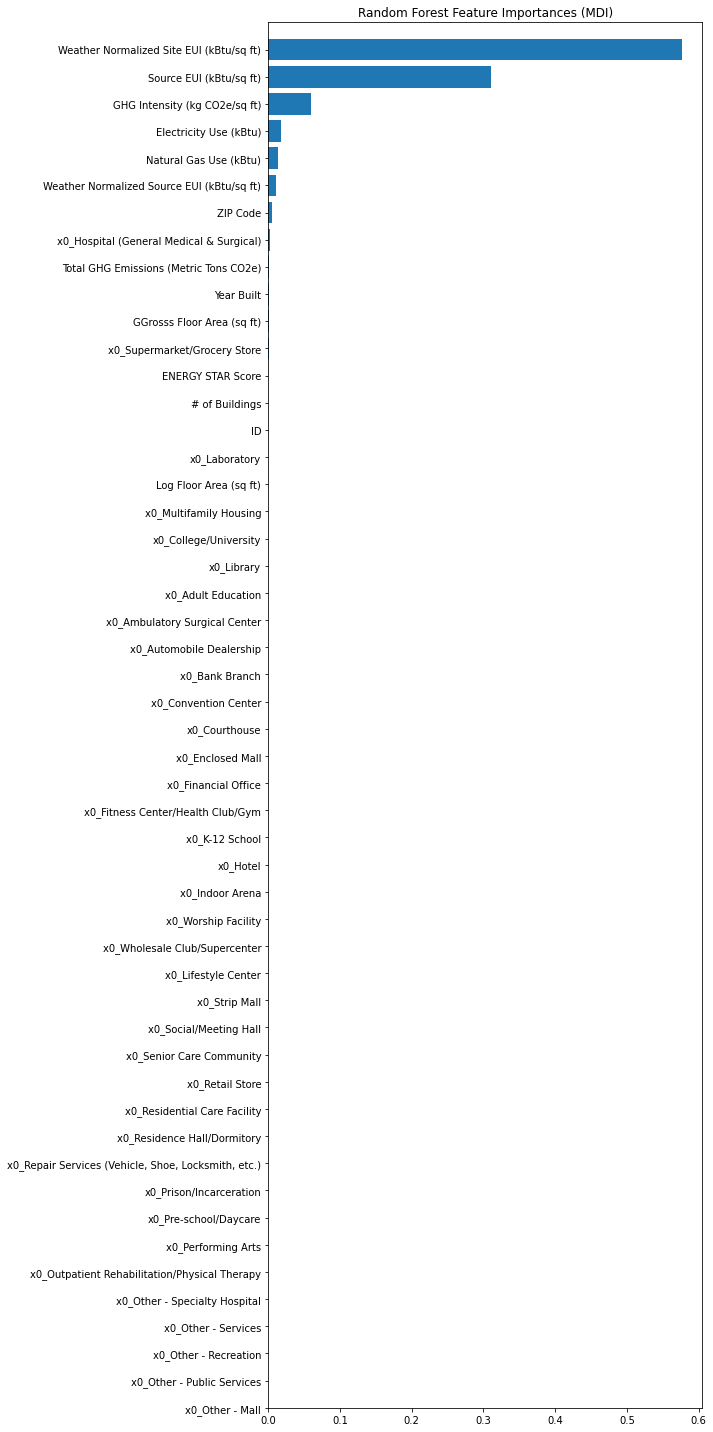

In [ ]:
y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, rf.feature_importances_[index])
ax.set_yticklabels(sor_names)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
ax.set_ylim(10, len(feature_names))
plt.show()



Fig 2. This figure shows the importance of different variables used in this method. The target variable for the training regression model is Site EUI. This variable is the amount of heat and electricity consumed by the building. So variables having a more significant correlation with Site EUI would have greater MDI. Based on the result, Weather Normalized Site EUI, Source EUI, and GHG Intensity have the highest scores in a row, which seems rational because they all correlate closely with Site EUI. Natural gas has less connectivity because electrical energy is a large share of the user market, not gas. In the following levels, there is property type such as public places, universities, hotels, and groceries, which because of having central heating and cooling systems, consume more energy than residential complexes. Although the random forest method does not reveal causal relationships between variables, it could give important information about the correlations.

# FBB good

In [ ]:
# 
CAPTION HERE! How is your model, How is your feature importance results? what can you notice? is it interesting? is it insightful??


# TASK 6 do it for another city! note: the variable names wont be the same


# useful links and methods and functions I used: 

```df.dropna()``` to remove observation with missing variables

```df.drop(columns, axis=1)``` to remove features (columns)


```np.log10()``` and ```np.isinf()``` to convert to log space and find infinite values  

`np.hstack([X1, X2])` to concatenate two arrays


one hot encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


KNN imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/, and 
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/  